# RUN ME FIRST!

These are some standard libraries you need to import before any of these code examples will work:

In [1]:
%matplotlib inline

In [2]:
from IPython.display import Image
from IPython.html.widgets import interact
from numpy import pi, cos, sin
import numpy as np
import pylab as plt

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Introduction to Interferometery and Synthesis Imaging

Sythesis imaging is a method to combine the outputs of multiple radio antennas into a single image, boosting angular resolution and overall sensitivity. It depends upon the outputs of antennas being *interfered* together in pairs, measuring the amplitude and phase of the interfered signal. The output of each interfered pair gives information about the sky, which can be aggregated to form an image of the sky.

This notebook gives a quick interactive introduction to radio interferometers and synthesis imaging.

### A simple interferometer

A radio interferometer computes pair-wise correlations between antennas. For an array of $N_ant$ antennas, the number of possible pairs of antennas is given by

$$ N_{pairs} = \frac{(N_{ant})(N_{ant} - 1)}{2}.$$

To give a simple example, imagine an array of three simple isotropic antennas (i.e. uniform sensitivity), arranged in a line with equal spacing $b$ between antennas:

<img src="images/interferometer.png"/>

**Fig 1:** Geometry of an elementary three-element interfometer. Three antennas (elements) are arranged in a line with a spacing $b$ between them.

If we connect the voltage outputs of the antennas to a device that cross-multiplies pairs of voltage streams $V_aV_b^*$, then we have a simple three-element interferometer, as shown in Fig 1. here, \* denotes complex conjugation. Such a device is known as a *correlator*.

Now, consider a single source at a sufficient distance to that the incident wavefront can be considered a plane wave. For now, let's consider the sources radiation to be given by

$$e(t) = sin(2\pi\nu t)$$

where $\nu$ represents frequency and $t$ represents time. The radiation will reach the right-hand antenna before the left-hand antenna by a time equal to

$$\tau_g = \frac{2b sin\theta}{c},$$

where $c$ is the speed of light, and $\theta$ is the angle of incidence. Given this, the output of the middle cross-multiplier in the diagram is:

$$F = sin(2\pi\nu t)sin2\pi\nu(t - \tau_g),$$

for which time average of which can be shown to be $<F> = cos2\pi\nu t_g$. This is known as the *fringe frequency*, and can be considered the fundamental measurement from which interferometric synthesis images are created.

### Fringe frequency


The "fringe function" $F$ is given by Eq. 2.2 in your textbook:

$$F = cos2\pi\nu\tau_g=cos(\frac{2\pi b l}{\pi})$$

Where $l=sin(\theta)$. Here, $\theta$ is the "pointing angle" of the telescope.

As the point source transits across the sky, the value of $\theta$ changes and the fringe function will respond accordingly:

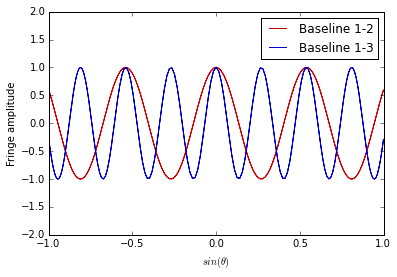

In [3]:
def plot_fringe(bl_length, wavelength):
    """ Plot the fringe function for a baseline (see Fig 1)
    
    bl_length:      distance between antennas, in m
    wavelength:     wavelength, in m
    """
    theta = np.linspace(-np.pi, np.pi, 401)
    l = sin(theta)
    F = cos(2 * pi * bl_length * l / wavelength)
    F2 = cos(2 * pi * 2 * bl_length * l / wavelength)
    
    plt.plot(l, F, c='#cc0000', label="Baseline 1-2")
    plt.plot(l, F2, c='#0000cc', label="Baseline 1-3")
    plt.xlabel("$sin(\\theta)$")
    plt.ylabel("Fringe amplitude")
    plt.ylim(-2, 2)
    plt.legend()

f = interact(plot_fringe, bl_length=(1, 100), wavelength=(1, 100))

We see that as baseline increases, the fringe function oscillates more rapidly. 

### Multiple sources

Things get more complicated when there is more than a single point source in the sky. Image that our point source has an companion a distance of $\theta_{spc}$ away. What would then output of the correlator look like?

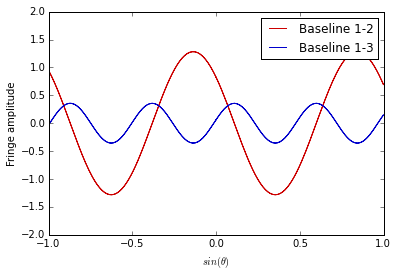

In [8]:
def plot_fringe(bl_length, wavelength, source_spacing):
    """ Plot the fringe function for a baseline with 2 sources (see Fig 1)
    
    bl_length:      distance between antennas, in m
    wavelength:     wavelength, in m
    source_spacing: distance between sources, in degrees
    """
    theta = np.linspace(-np.pi, np.pi, 401)
    l = sin(theta)
    l_spc = sin(source_spacing / 57.3)
    
    # first baseline
    F_src1_bl1 = cos(2 * pi * bl_length * l / wavelength)
    F_src2_bl1 = cos(2 * pi * bl_length * (l - l_spc) / wavelength)
    F_bl1 = F_src1_bl1 + F_src2_bl1
    
    # second baseline
    F_src1_bl2 = cos(2 * pi * 2 * bl_length * l / wavelength)
    F_src2_bl2 = cos(2 * pi * 2* bl_length * (l - l_spc) / wavelength)
    F_bl2 = F_src1_bl2 + F_src2_bl2
    
    plt.plot(l, F_bl1, c='#cc0000', label="Baseline 1-2")
    plt.plot(l, F_bl2, c='#0000cc', label="Baseline 1-3")
    plt.xlabel("$sin(\\theta)$")
    plt.ylabel("Fringe amplitude")
    plt.ylim(-2, 2)
    plt.legend()

f = interact(plot_fringe, bl_length=(1, 100), wavelength=(1, 100), source_spacing=(0, 90))

Have a play around with the source spacing and you'll see that some source spacings result in absolutely no response (i.e. fringe amplitude is uniformly zero, no matter what the position $\theta$ of the first source is).

By now I hope you're convinced that the output of the correlator is telling you a lot of information about the composition of the sky. But how do we turn these data into images? To answer that will require a bit more reading of your textbook and a bunch of math. So you'll have to wait until the next notebook!

## Concepts to remember

* What is a radio interferometer?
* What is the formula for computing the number of pairs of antennas in an array?
* What is a correlator?
* What are fringe frequencies, and how do they depend upon antenna spacing, wavelength, etc?

## Things to ponder

*NB: This is a good time to copy, paste & hack the examples to make some discoveries*

* What happens if you have $N$ equally spaced sources instead of two?

## Aside: correlator computations

Cross-correlation of every sample at [Nyquist rate](http://www.dspguide.com/ch3/2.htm) for every antenna pair can be very computationally expensive. Pairwise correlation of all antennas is an $O(N^2)$ operation, meaning that as the number of antennas $N$ increases, the number of computations required increases in proportion to $N^2$.

More precisely, the number of possible pairs of antennas (counting pairing with themselves) is given by

$$ N_{pairs} = \frac{(N_{ant})(N_{ant} + 1)}{2}.$$

The number of computation operations required per second (measured in [FLOP/s](https://en.wikipedia.org/wiki/FLOPS)) also depends upon the bandwidth of the digitized signals. Radio arrays tend to have signal bandwidths $\Delta\nu$  in the range 10 MHz - 10 GHz; digitization requires sampling at a rate $2\Delta\nu$. 

The widget below computes the number of FLOP/s a correlator would need for a given bandwidth and number of antennas. A rough estimate of how many graphics processing units (GPUs) would be required if they are used to do the computation is also given, along with how much they'd cost to purchase (you would need host systems for them as well!)

In [10]:
tflops_per_gpu = 1.5     # TFLOP/s achievable on a single GPU, NVIDIA GTX960
cost_per_gpu   = 250.0   # Cost per GPU

def n_ops(bandwidth, n_ant):
    n_pol = 2
    n_antpol = n_ant * n_pol
    n_baselines = (n_antpol) * (n_antpol + 1) / 2 # Dual-pol + autocorrelations
    mult_per_sec = n_baselines * bandwidth 
    tflops_per_sec = mult_per_sec  * 5 / 1e6
    n_gpu = np.ceil(tflops_per_sec / tflops_per_gpu)
    
    to_print =  "Bandwidth:                     %s MHz\n" % bandwidth
    to_print += "Number of antennas:            %i\n" % n_ant
    to_print += "Number of baselines (dualpol): %i\n" % n_baselines
    to_print += "Correlator computations:       %2.3f TFLOP/s\n" % tflops_per_sec
    to_print += "Number of GPUs required:       %i\n" % n_gpu
    to_print += "Cost to purchase:              $%i" % (n_gpu * cost_per_gpu)
    print to_print

f = interact(n_ops, bandwidth=(1, 1e3), n_ant=(2, 1024))

Bandwidth:                     553.3 MHz
Number of antennas:            320
Number of baselines (dualpol): 205120
Correlator computations:       567.464 TFLOP/s
Number of GPUs required:       379
Cost to purchase:              $94750
